### Imports

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import math

from colorsetup import colors, palette

### Read the data

In [104]:
gcr_data = pd.read_csv("german_credit_data.csv", index_col=0)

In [105]:
gcr_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [106]:
y = (gcr_data['Risk']=='good').astype(int)
correlations = gcr_data[list(gcr_data.columns[:-1])].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Duration        -0.214927
Credit amount   -0.154739
Job             -0.032735
Age              0.091127
dtype: float64

### Handling Missing Values
https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

In [107]:
from sklearn.impute import SimpleImputer
values = gcr_data.values 
imputer = SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='missing') 
transformed_values = imputer.fit_transform(values) 

In [108]:
gcr_data_imputed = pd.DataFrame(transformed_values, columns=gcr_data.columns)

In [109]:
gcr_data_imputed["Credit amount"] = gcr_data_imputed["Credit amount"].astype(int)
gcr_data_imputed["Duration"] = gcr_data_imputed["Duration"].astype(int)
gcr_data_imputed["Job"] = gcr_data_imputed["Job"].astype(int)
gcr_data_imputed["Age"] = gcr_data_imputed["Age"].astype(int)

In [110]:
feature_cols = [x for x in gcr_data_imputed.columns if x!='Risk']
X = gcr_data_imputed[feature_cols]
y = gcr_data_imputed['Risk']
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,missing,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,missing,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [111]:
from sklearn.preprocessing import LabelEncoder
le_tar = LabelEncoder()
gcr_data_imputed['Risk'] = le_tar.fit_transform(gcr_data_imputed['Risk'])

### One-hot-coding on Dummy Vaiables

In [112]:
one_hot_encode_cols = X.dtypes[X.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

X[one_hot_encode_cols].head()

,Sex,Housing,Saving accounts,Checking account,Purpose
0,male,own,missing,little,radio/TV
1,female,own,little,moderate,radio/TV
2,male,own,little,missing,education
3,male,free,little,little,furniture/equipment
4,male,free,little,little,car


Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.

In [113]:
X['Saving accounts'].value_counts()

little        603
missing       183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [114]:
X = pd.get_dummies(X, columns=one_hot_encode_cols, drop_first=True)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Sex_male,1000.0,0.690,0.462725,0.0,0.0,1.0,1.00,1.0
Housing_own,1000.0,0.713,0.452588,0.0,0.0,1.0,1.00,1.0
Housing_rent,1000.0,0.179,0.383544,0.0,0.0,0.0,0.00,1.0
Saving accounts_missing,1000.0,0.183,0.386860,0.0,0.0,0.0,0.00,1.0
Saving accounts_moderate,1000.0,0.103,0.304111,0.0,0.0,0.0,0.00,1.0
Saving accounts_quite rich,1000.0,0.063,0.243085,0.0,0.0,0.0,0.00,1.0


### Log transforming skew variables

In [115]:
X.select_dtypes('number').head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_missing,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_missing,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [116]:
X.select_dtypes('object').head()

""
0
1
2
3
4


In [117]:
num_cols = gcr_data.select_dtypes('number').columns.values

skew_vals = gcr_data[num_cols].skew()

In [118]:
skew_vals

Age              1.020739
Job             -0.374295
Credit amount    1.949628
Duration         1.094184
dtype: float64

In [119]:
skew_limit = 0.75
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Credit amount,1.949628
Duration,1.094184
Age,1.020739


In [120]:
for col in skew_cols.index.values:
    X[col] = X[col].apply(np.log1p)

### Polynomial Features

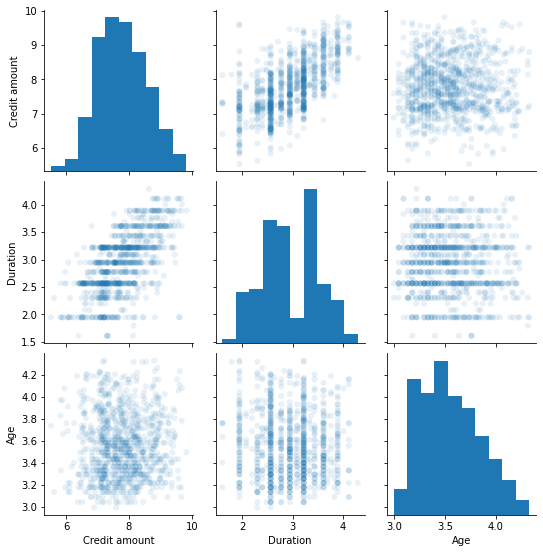

In [121]:
sns.pairplot(X[skew_cols.index.values], plot_kws=dict(alpha=.1, edgecolor='none'))

In [122]:
from sklearn.preprocessing import PolynomialFeatures

In [123]:
pf = PolynomialFeatures(degree=2)

In [124]:
X_copy = X.copy()

In [125]:
features = ['Credit amount', 'Duration']
pf.fit(X_copy[features])

PolynomialFeatures()

In [126]:
pf.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [127]:
feat_array = pf.transform(X_copy[features])
pf_df = pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))
pf_df.head()

,1,Credit amount,Duration,Credit amount^2,Credit amount Duration,Duration^2
0,1.0,7.064759,1.945910,49.910820,13.747386,3.786566
1,1.0,8.691483,3.891820,75.541869,33.825688,15.146265
2,1.0,7.648263,2.564949,58.495927,19.617407,6.578965
3,1.0,8.972464,3.761200,80.505107,33.747232,14.146626
4,1.0,8.491055,3.218876,72.098007,27.331650,10.361162


In [128]:
pf_df.columns[1:]

Index(['Credit amount', 'Duration', 'Credit amount^2',
       'Credit amount Duration', 'Duration^2'],
      dtype='object')

In [129]:
y = (gcr_data['Risk']=='good').astype(int)
correlations = pf_df[list(pf_df.columns[1:])].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Duration^2               -0.216570
Duration                 -0.215280
Credit amount Duration   -0.196079
Credit amount^2          -0.116228
Credit amount            -0.109588
dtype: float64

### Correlation Heatmap

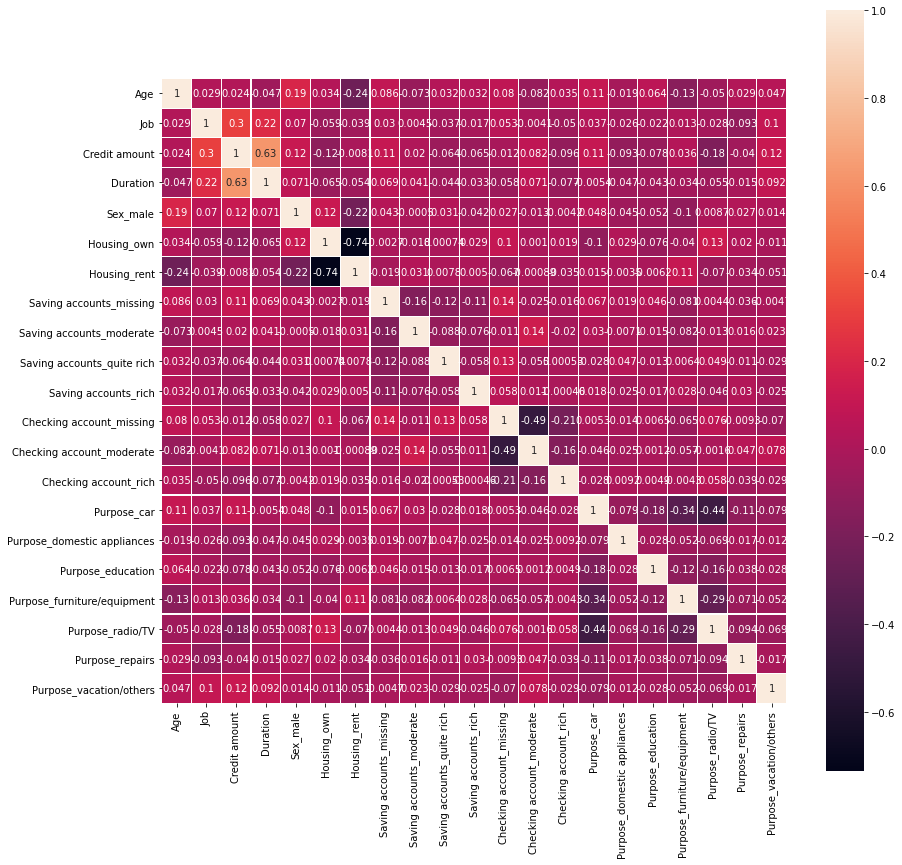

In [133]:
feature_cols = X.columns
#print(feature_cols)

plt.figure(figsize=(14,14))
sns.heatmap(X[feature_cols].corr(), annot=True, square=True, linecolor='white', linewidths=0.1)
plt.show()

### StratifiedShuffleSplit

In [136]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X[feature_cols], gcr_data_imputed.Risk))

# Create the dataframes
X_train = X.loc[train_idx, feature_cols]
y_train = gcr_data_imputed.loc[train_idx, 'Risk']

X_test  = X.loc[test_idx, feature_cols]
y_test  = gcr_data_imputed.loc[test_idx, 'Risk']

### Logistic Regression: Vanilla, L1 and L2

In [137]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [138]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [139]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [140]:
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1]], 
                                 codes=[[0], [0]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

,lr,l1,l2
,0,0,0
10,0.983611,1.195065,1.173843
2,0.022949,0.018726,0.032328
5,0.228285,0.209423,0.229689
11,1.606290,1.683304,1.671500
12,0.271737,0.300391,0.307774
6,-0.083038,-0.072730,-0.072210
4,0.323988,0.328421,0.332129
3,-0.885960,-0.907073,-0.912554
9,0.550193,0.596427,0.634621


In [141]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,1,1,1
1,0,0,0
2,1,1,1
3,1,1,1
4,1,1,1


In [142]:
y_pred[y_pred.lr != y_pred.l1]

,lr,l1,l2
15,1,0,0
26,0,1,0
111,1,0,0
271,1,0,1
282,1,0,0


In [143]:
y_prob.head()

,lr,l1,l2
0,0.932172,0.935746,0.937251
1,0.536169,0.558753,0.563450
2,0.892218,0.901683,0.896612
3,0.902016,0.908082,0.906064
4,0.644143,0.658179,0.654948


The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’.

The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

In [145]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [146]:
metrics

,lr,l1,l2
precision,0.716760,0.729713,0.721487
recall,0.736667,0.746667,0.740000
fscore,0.713259,0.726655,0.719462
accuracy,0.736667,0.746667,0.740000
auc,0.627778,0.644444,0.636508


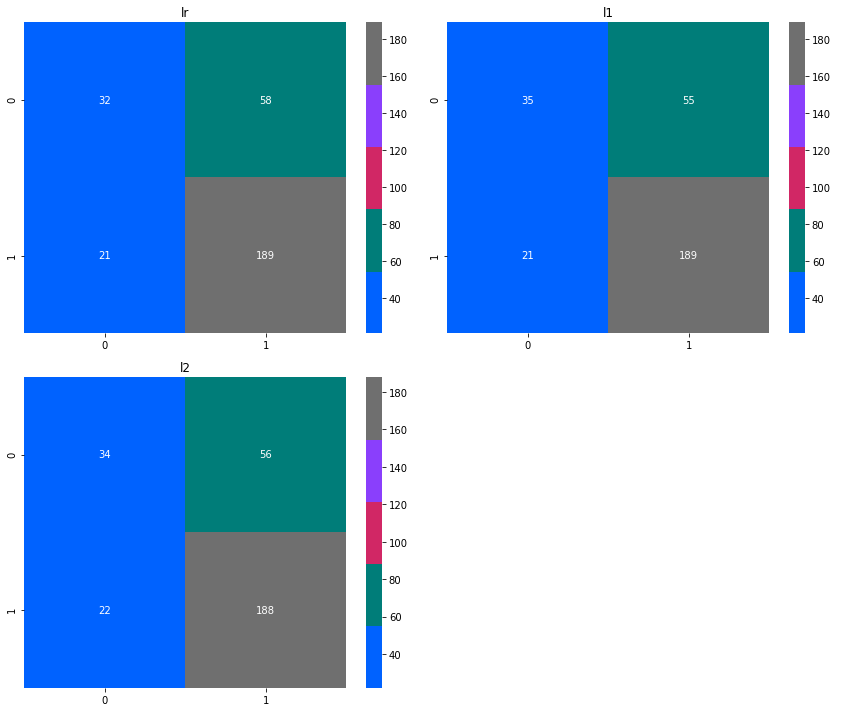

In [147]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()